# This notebook is made to visualize differential equations
---

## In particular we will focus on second order differential equations

##### Our differential equation can be written as follows:
> With _a_ and _b_ as parameters

$$
\begin{cases}
    \dot{x} = x(3 - ax - by) \\
    \dot{y} = y(2 - x - y)
\end{cases}
$$

---

### The analysis will be done in the following points:

1. [Visualizing the vecotor field](##Visualizing_the_vecotor_field)
2. [Simulating the trajectories](##Simulating_the_trajectories)
3. [Analyzing non-linear parts of the manifold](Analyzing_non-linear_parts_of_the_manifold)

---

The differential equation rappresents two populations, one of rabbits and on of sheeps ....

## Visualizing the vecotor field

### Reqiurements installation in quiet mode

In [1]:
!pip3 -q install numpy
!pip3 -q install matplotlib

#### Imoprt necessary libraires

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#### Define the differential equation

In [3]:
def eq_diff(x,y,a,b):
    u = x * (3 - a * x - b * y)
    v = y * (2 - x - y)
    return (u,v)

#### Function to create plots

In [8]:
def create_phase_diagrams(a_vals, b_vals, axs = None):    
    # If we only do one plot
    if axs is None:
        a = 1
        b = 2
        
        # Generate some random data
        x, y = np.meshgrid(np.arange(0, 3.5, 0.1), np.arange(0, 2.5, 0.1))
        u = x * (3 - a * x - b * y)
        v = y * (2 - x - y)
        
        # Calculate the magnitude of each vector
        mag = np.clip(np.sqrt(u**2 + v**2), -10, 2)
        
        # Normalize the vectors
        norm = np.sqrt(u**2 + v**2)
        u = np.divide(u, norm, out=np.zeros_like(u), where=norm!=0)
        v = np.divide(v, norm, out=np.zeros_like(v), where=norm!=0)
        
        # Create the plot
        fig, ax = plt.subplots()
        
        # Set the colormap to 'cool'
        q = ax.quiver(x, y, u, v, mag, cmap='Spectral_r')
        
        # Set the colorbar limits to the range of the magnitudes
        q.set_clim([mag.min(), mag.max()])
        
        # Set the colorbar ticks and labels
        cbar = plt.colorbar(q)
        cbar.set_ticks([mag.min(),(mag.min() + mag.max())/ 2, mag.max()])
        cbar.set_ticklabels(['Low', 'Medium', 'High'])

    # If we want to craete more plots 
    else:
        # Iterate over the subplots and plot a graph in each one
        for i, ax in enumerate(axs.flat):
            # Set the values of a and b based on the index i
            a = a_vals[i]
            b = b_vals[i]

            # Generate the data for the graph
            x, y = np.meshgrid(np.arange(0, 3.5, 0.1), np.arange(0, 2.5, 0.1))
        
            # unpack the return value
            u,v = eq_diff(x,y,a,b)
        
            # Calculate the magnitude and normalize the vectors
            mag = np.clip(np.sqrt(u**2 + v**2), -10, 2)
            norm = np.sqrt(u**2 + v**2)
            u = np.divide(u, norm, out=np.zeros_like(u), where=norm!=0)
            v = np.divide(v, norm, out=np.zeros_like(v), where=norm!=0)
            
            # Plot the graph using quiver plot
            q = ax.quiver(x, y, u, v, mag, cmap='Spectral_r')
            q.set_clim([mag.min(), mag.max()])
        
            # Add a colorbar to the graph
            cbar = plt.colorbar(q, ax=ax)
            cbar.set_ticks([mag.min(),(mag.min() + mag.max())/ 2, mag.max()])
            cbar.set_ticklabels(['Low', 'Medium', 'High'])
        
            # Add a title to the subplot
            ax.set_title(f'Graph values: a={a}, b={b}')

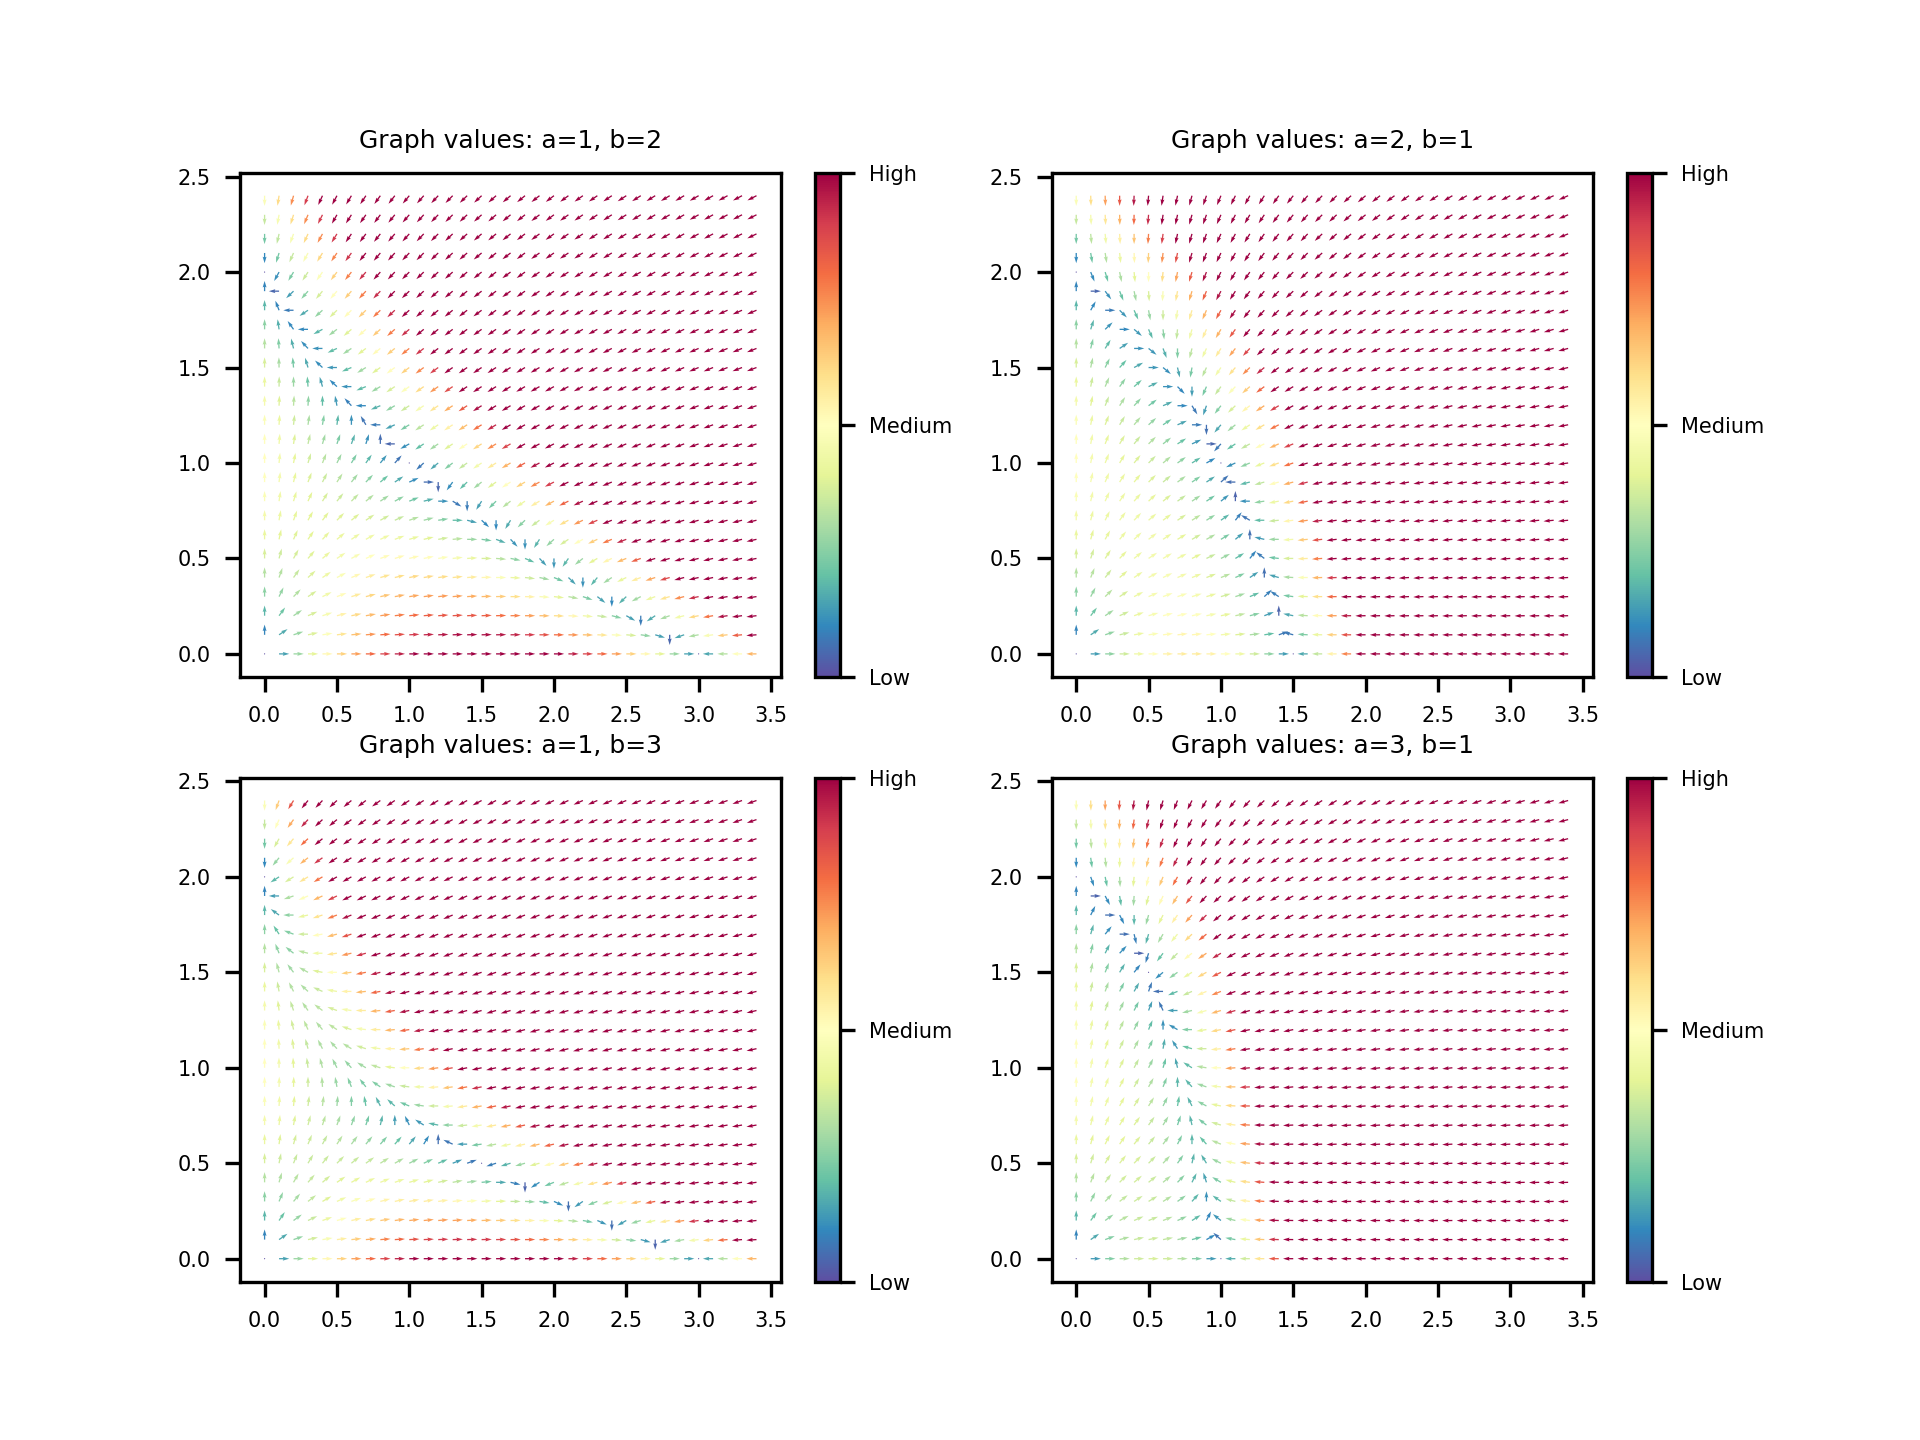

In [9]:
# Visualize the graph and be able to do things like zoom etc...
%matplotlib widget

# Set the DPI of the figure
plt.rcParams['figure.dpi'] = 300
# Set the font size of the labels and title
plt.rcParams['font.size'] = 5

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2)

a_vals = [1, 2, 1, 3]
b_vals = [2, 1, 3, 1]

create_phase_diagrams(a_vals,b_vals,axs)

# Display the plot
plt.show()
# Close all open figures
plt.close('all')

### Visualize the plot we care most about

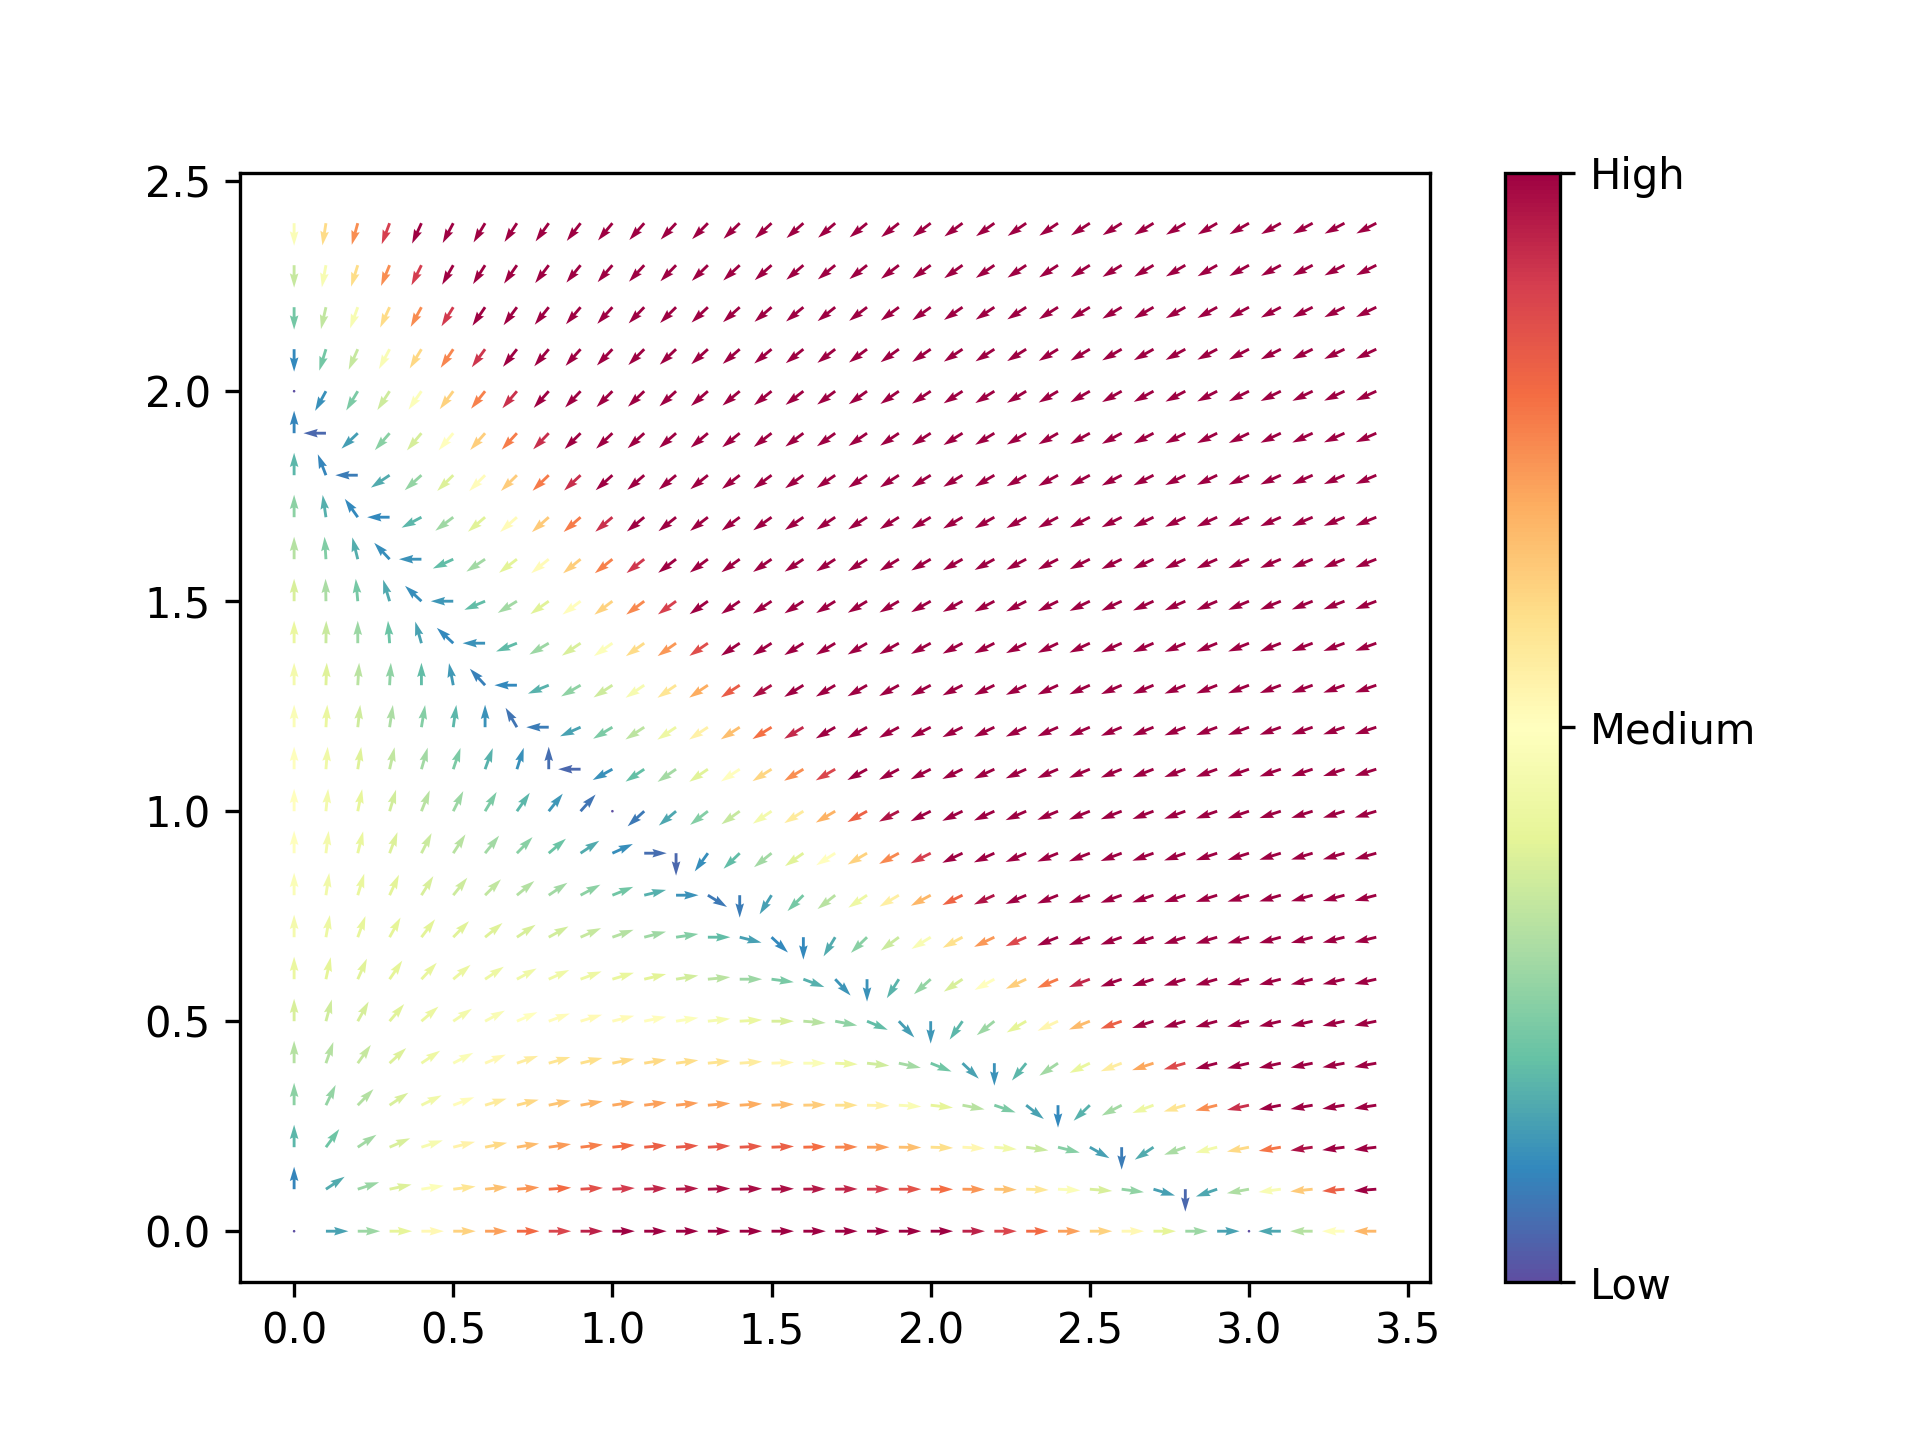

In [10]:
# Visualize the graph and be able to do things like zoom etc...
%matplotlib widget

# Set the DPI of the figure
plt.rcParams['figure.dpi'] = 300
# Set the font size of the labels and title
plt.rcParams['font.size'] = 10

a_vals = 1
b_vals = 2

create_phase_diagrams(a_vals,b_vals)

# Display the plot
plt.show()

## Simulating the trajectories

## Analyzing non-linear parts of the manifold